# XRADIO Demo

XRADIO is an open-source Python package that leverages [xarray](https://github.com/pydata/xarray) to provide an interface for radio astronomy data. It includes converters from legacy formats and contains versioned schemas for each dataset type. A schema checker is also included to verify if a dataset conforms to the schema.

Data is organized into:

- [xarray Datasets](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html): A multi-dimensional, in-memory, array database of labeled n-dimensional arrays.
- `XRADIO Processing Sets`: XRADIO-specific data structure, based on a Python dictionary, that consists of a collection of `xarray Datasets`. We will be looking into replacing the processing set with [xarray Datatree](https://xarray-datatree.readthedocs.io/en/latest/) in the future.

## Import xradio

In [1]:
import os, pprint
from importlib.metadata import version

try:
    os.system("pip install --upgrade xradio")

    import xradio

    print("Using xradio version", version("xradio"))

except ImportError as exc:
    print(f"Could not import xradio: {exc}")

ERROR: Ignored the following versions that require a different python version: 0.0.1 Requires-Python <3.12,>=3.8; 0.0.10 Requires-Python <3.12,>=3.8; 0.0.11 Requires-Python <3.12,>=3.8; 0.0.12 Requires-Python <3.12,>=3.8; 0.0.13 Requires-Python <3.12,>=3.8; 0.0.14 Requires-Python <3.12,>=3.8; 0.0.15 Requires-Python <3.12,>=3.8; 0.0.16 Requires-Python <3.12,>=3.8; 0.0.17 Requires-Python <3.12,>=3.8; 0.0.19 Requires-Python <3.12,>=3.8; 0.0.20 Requires-Python <3.12,>=3.8; 0.0.21 Requires-Python <3.12,>=3.8; 0.0.22 Requires-Python <3.12,>=3.8; 0.0.23 Requires-Python <3.12,>=3.8; 0.0.24 Requires-Python <3.12,>=3.8; 0.0.25 Requires-Python <3.12,>=3.9; 0.0.26 Requires-Python <3.12,>=3.9; 0.0.27 Requires-Python <3.12,>=3.9; 0.0.28 Requires-Python <3.12,>=3.9; 0.0.29 Requires-Python <3.12,>=3.9; 0.0.3 Requires-Python <3.12,>=3.8; 0.0.30 Requires-Python <3.12,>=3.9; 0.0.31 Requires-Python <3.12,>=3.9; 0.0.33 Requires-Python <3.12,>=3.9; 0.0.34 Requires-Python <3.12,>=3.9; 0.0.36 Requires-Python 

Using xradio version 0.0.45


## Setup Dask Client

In [2]:
from toolviper.dask import local_client

viper_client = local_client(cores=4, memory_limit="4GB")
viper_client

[2024-12-03 16:37:03,390]     INFO    viperlog:  Module path: /home/h14471mj/anaconda3/envs/xradio/lib/python3.12/site-packages/toolviper 
[2024-12-03 16:37:03,399]  WARNING    viperlog:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2024-12-03 16:37:05,369]     INFO    viperlog:  Client <MenrvaClient: 'tcp://127.0.0.1:40133' processes=4 threads=4, memory=14.90 GiB> 


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40133,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:36461,Total threads: 1
Dashboard: http://127.0.0.1:41531/status,Memory: 3.73 GiB
Nanny: tcp://127.0.0.1:41053,


## Processing Set

A Processing Set is an extended Python dictionary that consists of MSv4s that contains a single observation, spectral window, polarization setup, observation mode, processor and beam per antenna.

### Convert MSv2 => Processing Set (PS)

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set
import wget
import tarfile

url = "https://www.e-merlin.ac.uk/distribute/CY8/TS8004/TS8004_C_001_20190801.tar"
filename = wget.download(url)

filename = "TS8004_C_001_20190801.tar"
tar = tarfile.open(filename)
tar.extractall()
tar.close()

msv2_name = "TS8004_C_001_20190801/TS8004_C_001_20190801_avg.ms/"
convert_out = "test/TS8004_C_001_20190801_avg.ms.vis.zarr"

convert_msv2_to_processing_set(
    in_file=msv2_name,
    out_file=convert_out,
    overwrite=True,
    parallel=True,
)

[2024-12-03 16:37:09,245]     INFO    viperlog:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-12-03 16:37:09,332]     INFO    viperlog:  Number of partitions: 20 
[2024-12-03 16:37:09,334]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [3], SCAN [  1  92 183 275] 
[2024-12-03 16:37:09,336]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [2], SCAN [  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  93  95  97  99 101 103 105 107 109
 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145
 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181
 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217 219
 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253 255
 257 259 261 263 265 267 269 271 273 278 280 282 2

[2024-12-03 16:37:09,389]     INFO    viperlog:  OBSERVATION_ID [0], DDI [3], STATE [-1], FIELD [1], SCAN [  3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35  37
  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73
  75  77  79  81  83  85  87  89  91  94  96  98 100 102 104 106 108 110
 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146
 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182
 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220
 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256
 258 260 262 264 266 268 270 272 274 279 281 283 285 287 289 291 293 295
 297 299 301 303 305 307 309 311 313 315 317 319 321 323 325 327 329 331
 333 335 337 339 341 343 345 347 349 351 353 355 357 359 361 363 365 367] 
[2024-12-03 16:37:09,393]     INFO    viperlog:  OBSERVATION_ID [0], DDI [3], STATE [-1], FIELD [0], SCAN [184 276 368] 
[2024-12-03 16:37:09,397]     INFO    vip

### Lazy open PS

In [4]:
from xradio.measurement_set import open_processing_set
convert_out = "test/TS8004_C_001_20190801_avg.ms.vis.zarr"

ps = open_processing_set(convert_out)

In [5]:
len(ps)

20

## PS Methods: Summary

Generate and retrieve a summary of the Processing Set.

The summary includes information such as the names of the Measurement Sets, their intents, polarizations, spectral window names, field names, source names, field coordinates, start frequencies, and end frequencies.

In [6]:
import pandas as pd
pd.set_option('display.max_rows', None)
ps.summary() #returns a pandas dictionary.

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
2,TS8004_C_001_20190801_avg_00,[obs_0],"(1944, 15, 128, 4)","[RR, RL, LR, LL]","[1, 92, 183, 275]",spw_0,[0319+4130_3],[Unknown],[],"[fk5, 3h19m48.16s, 41d30m42.10s]",4.816500e+09,4.943500e+09
9,TS8004_C_001_20190801_avg_01,[obs_0],"(5215, 15, 128, 4)","[RR, RL, LR, LL]","[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2...",spw_0,[1302+5748_2],[Unknown],[],"[fk5, 13h02m52.47s, 57d48m37.61s]",4.816500e+09,4.943500e+09
15,TS8004_C_001_20190801_avg_02,[obs_0],"(10625, 15, 128, 4)","[RR, RL, LR, LL]","[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 2...",spw_0,[1252+5634_1],[Unknown],[],"[fk5, 12h52m26.29s, 56d34m19.49s]",4.816500e+09,4.943500e+09
12,TS8004_C_001_20190801_avg_03,[obs_0],"(1347, 15, 128, 4)","[RR, RL, LR, LL]","[184, 276, 368]",spw_0,[1331+3030_0],[Unknown],[],"[fk5, 13h31m08.29s, 30d30m32.96s]",4.816500e+09,4.943500e+09
11,TS8004_C_001_20190801_avg_04,[obs_0],"(898, 15, 128, 4)","[RR, RL, LR, LL]","[277, 369]",spw_0,[1407+2827_4],[Unknown],[],"[fk5, 14h07m00.39s, 28d27m14.69s]",4.816500e+09,4.943500e+09
18,TS8004_C_001_20190801_avg_05,[obs_0],"(1944, 15, 128, 4)","[RR, RL, LR, LL]","[1, 92, 183, 275]",spw_1,[0319+4130_3],[Unknown],[],"[fk5, 3h19m48.16s, 41d30m42.10s]",4.944500e+09,5.071500e+09
5,TS8004_C_001_20190801_avg_06,[obs_0],"(5215, 15, 128, 4)","[RR, RL, LR, LL]","[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2...",spw_1,[1302+5748_2],[Unknown],[],"[fk5, 13h02m52.47s, 57d48m37.61s]",4.944500e+09,5.071500e+09
13,TS8004_C_001_20190801_avg_07,[obs_0],"(10625, 15, 128, 4)","[RR, RL, LR, LL]","[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 2...",spw_1,[1252+5634_1],[Unknown],[],"[fk5, 12h52m26.29s, 56d34m19.49s]",4.944500e+09,5.071500e+09
10,TS8004_C_001_20190801_avg_08,[obs_0],"(1347, 15, 128, 4)","[RR, RL, LR, LL]","[184, 276, 368]",spw_1,[1331+3030_0],[Unknown],[],"[fk5, 13h31m08.29s, 30d30m32.96s]",4.944500e+09,5.071500e+09
17,TS8004_C_001_20190801_avg_09,[obs_0],"(898, 15, 128, 4)","[RR, RL, LR, LL]","[277, 369]",spw_1,[1407+2827_4],[Unknown],[],"[fk5, 14h07m00.39s, 28d27m14.69s]",4.944500e+09,5.071500e+09


## PS Methods: Sub-selecting from PS
Select a subset of the Processing Set based on specified criteria.

This method allows filtering the Processing Set by matching column names and values or by applying a Pandas query string. The selection criteria can target various attributes of the Measurement Sets such as intents, polarization, spectral window names, etc.

In [8]:
# sub_ps = ps.sel(intents="OBSERVE_TARGET#ON_SOURCE",spw_name="FULL_RES",string_exact_match=False)
# sub_ps.summary()

In [9]:
sub_ps = ps.sel(field_name=["0319+4130_3"])
sub_ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,TS8004_C_001_20190801_avg_00,[obs_0],"(1944, 15, 128, 4)","[RR, RL, LR, LL]","[1, 92, 183, 275]",spw_0,[0319+4130_3],[Unknown],[],"[fk5, 3h19m48.16s, 41d30m42.10s]",4.816500e+09,4.943500e+09
3,TS8004_C_001_20190801_avg_05,[obs_0],"(1944, 15, 128, 4)","[RR, RL, LR, LL]","[1, 92, 183, 275]",spw_1,[0319+4130_3],[Unknown],[],"[fk5, 3h19m48.16s, 41d30m42.10s]",4.944500e+09,5.071500e+09
2,TS8004_C_001_20190801_avg_10,[obs_0],"(1944, 15, 128, 4)","[RR, RL, LR, LL]","[1, 92, 183, 275]",spw_2,[0319+4130_3],[Unknown],[],"[fk5, 3h19m48.16s, 41d30m42.10s]",5.072500e+09,5.199500e+09
1,TS8004_C_001_20190801_avg_15,[obs_0],"(1944, 15, 128, 4)","[RR, RL, LR, LL]","[1, 92, 183, 275]",spw_3,[0319+4130_3],[Unknown],[],"[fk5, 3h19m48.16s, 41d30m42.10s]",5.200500e+09,5.327500e+09


## PS Methods: Phase Center

In [11]:
ps['TS8004_C_001_20190801_avg_05'].VISIBILITY.attrs['field_and_source_xds'] #Each VISIBILITY data variable has a field_and_source_xds attribute.

<xarray.Dataset> Size: 112B
Dimensions:             (sky_dir_label: 2)
Coordinates:
    field_name          <U11 44B ...
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         <U7 28B ...
Data variables:
    FIELD_PHASE_CENTER  (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    is_ephemeris:  False
    type:          field_and_source

In [12]:
field_and_source_xds, ephemris_field_and_source_xds = ps.get_combined_field_and_source_xds()
ephemris_field_and_source_xds

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

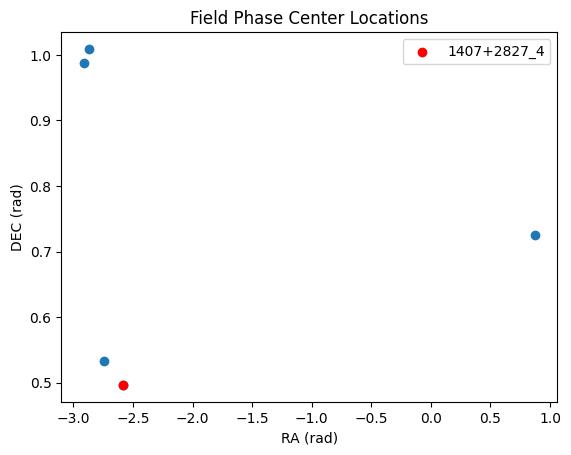

In [14]:
ps.plot_phase_centers()

## PS Methods: Antenna

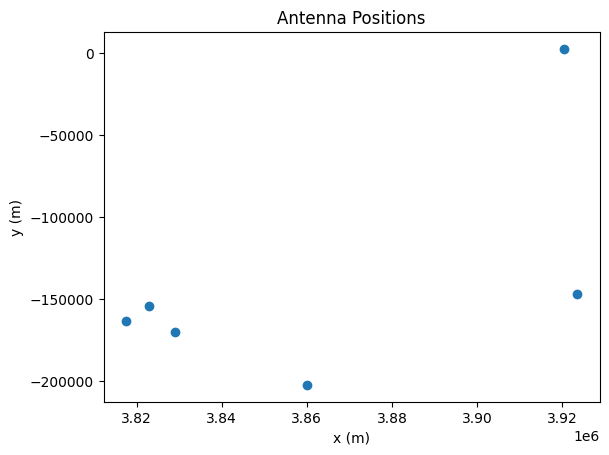

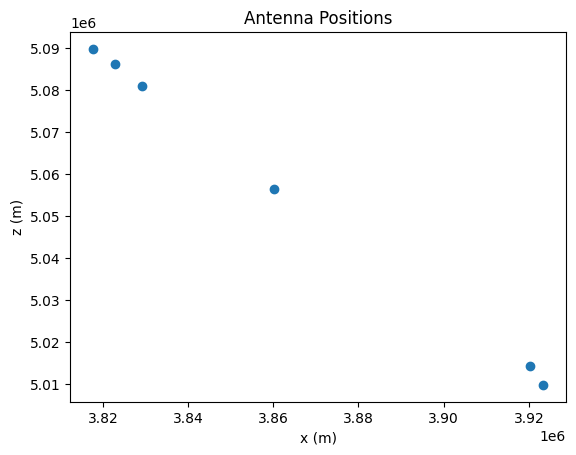

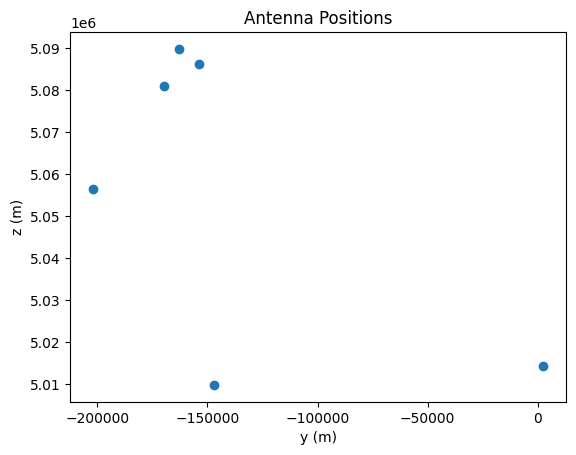

In [15]:
ps.plot_antenna_positions()

## MSv4 vs MSv2

- An MS v4 is fully self-describing and contains the information for a single observation, spectral window, polarization setup, observation mode, processor, and beam per antenna.
- Data is stored in Datasets of labeled n-dimensional arrays (called data variables) instead of tables.
- The table concept of rows has been replaced by relevant dimensions. For example, the VISIBILITY column in the MAIN table of MS v2 is now an n-dimensional array with dimensions time x baseline x frequency x polarization (row has been split into time x baseline).

## MSv4

<div style="text-align: center;">
    <figure id="figure-1" style="display: inline-block;">
        <img src="https://docs.google.com/drawings/d/e/2PACX-1vQVgjF5xNeIv8gpi2G3R8JXw2bNkVIUXdizIZluCGdnHc4z79ryW2fNUycJAd_CQh9sXLwdlx1oiAAX/pub?w=690&amp;h=510"
             alt="Processing Set and MS v4 schema layout."
             style="display: block; margin: auto;">
        <figcaption>Figure 1: Processing Set and MS v4 schema layout. Optional datasets are indicated by round brackets. Data variables are capitalized. The suffix '_xds' denotes an xarray dataset, while '_info' indicates dictionaries.</figcaption>
    </figure>
</div>

In [17]:
ms_xds = ps[
    "TS8004_C_001_20190801_avg_05"
]
ms_xds

<xarray.MeasurementSetXds> Size: 434MB
Dimensions:                     (baseline_id: 15, time: 1944, frequency: 128,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 120B 0 1 2 3 ... 11 12 13 14
    scan_number                 (time) int64 16kB dask.array<chunksize=(1944,), meta=np.ndarray>
  * time                        (time) float64 16kB 1.565e+09 ... 1.565e+09
  * frequency                   (frequency) float64 1kB 4.944e+09 ... 5.072e+09
  * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 233kB dask.array<chunksize=(1944, 15), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 15MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 233kB dask.array<chunksize=(1944, 15), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 700kB dask.array<chunksize=(1944, 15, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    VISIBILITY_CORRECTED        (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    VISIBILITY_MODEL            (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 60MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
Attributes:
    creation_date:     2024-12-03T16:37:28.571911+00:00
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['TS8004'], 'project': 'TS8004', 'release...
    partition_info:    {'field_name': ['0319+4130_3'], 'intents': ['obs_0'], ...
    processor_info:    {'sub_type': '', 'type': ''}
    schema_version:    4.0.-9994
    type:              visibility
    xradio_version:    0.0.45
    antenna_xds:       <xarray.Dataset> Size: 868B\nDimensions:              ...

### MSv4: Coordinates

In [18]:
ms_xds.time

<xarray.DataArray 'time' (time: 1944)> Size: 16kB
array([1.564702e+09, 1.564702e+09, 1.564702e+09, ..., 1.564760e+09,
       1.564760e+09, 1.564760e+09])
Coordinates:
    scan_number  (time) int64 16kB dask.array<chunksize=(1944,), meta=np.ndarray>
  * time         (time) float64 16kB 1.565e+09 1.565e+09 ... 1.565e+09 1.565e+09
Attributes:
    effective_integration_time:  EFFECTIVE_INTEGRATION_TIME
    format:                      unix
    integration_time:            {'attrs': {'type': 'quantity', 'units': ['s'...
    scale:                       utc
    type:                        time
    units:                       ['s']

### MSv4: Data Variables

In [19]:
ms_xds.WEIGHT

<xarray.DataArray 'WEIGHT' (time: 1944, baseline_id: 15, frequency: 128,
                            polarization: 4)> Size: 60MB
dask.array<open_dataset-WEIGHT, shape=(1944, 15, 128, 4), dtype=float32, chunksize=(1944, 15, 128, 4), chunktype=numpy.ndarray>
Coordinates:
    baseline_antenna1_name  (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
    baseline_antenna2_name  (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
  * baseline_id             (baseline_id) int64 120B 0 1 2 3 4 ... 11 12 13 14
    scan_number             (time) int64 16kB dask.array<chunksize=(1944,), meta=np.ndarray>
  * time                    (time) float64 16kB 1.565e+09 ... 1.565e+09
  * frequency               (frequency) float64 1kB 4.944e+09 ... 5.072e+09
  * polarization            (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
Attributes:
    type:     quanta
    units:    ['unkown']

In [20]:
ms_xds.VISIBILITY

<xarray.DataArray 'VISIBILITY' (time: 1944, baseline_id: 15, frequency: 128,
                                polarization: 4)> Size: 119MB
dask.array<open_dataset-VISIBILITY, shape=(1944, 15, 128, 4), dtype=complex64, chunksize=(1944, 15, 128, 4), chunktype=numpy.ndarray>
Coordinates:
    baseline_antenna1_name  (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
    baseline_antenna2_name  (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
  * baseline_id             (baseline_id) int64 120B 0 1 2 3 4 ... 11 12 13 14
    scan_number             (time) int64 16kB dask.array<chunksize=(1944,), meta=np.ndarray>
  * time                    (time) float64 16kB 1.565e+09 ... 1.565e+09
  * frequency               (frequency) float64 1kB 4.944e+09 ... 5.072e+09
  * polarization            (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
Attributes:
    type:                  quanta
    units:                 ['unkown']
    field_and_source_xds:  <xarray.Dataset> Size: 112B\nDimensions:          ...

In [21]:
import numpy as np 
np.abs(ms_xds.VISIBILITY).max().compute()

<xarray.DataArray 'VISIBILITY' ()> Size: 4B
array(0.0307113, dtype=float32)

### MSv4 sub-xds: antenna_xds

The MSv4 has xarray datasets in its attributes that represent metadata where n-dimensional arrays is included. Some examples are the `antenna_xds`, `weather_xds` and `pointing_xds`. This would be the equivalent to some subtables of the MSv2. Let's look into the antenna sub-xds:


In [22]:
ant_xds = ms_xds.attrs["antenna_xds"]
ant_xds

<xarray.Dataset> Size: 868B
Dimensions:                 (antenna_name: 6, cartesian_pos_label: 3,
                             receptor_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U3 72B 'Mk2' 'Kn' 'De' ... 'Da' 'Cm'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U6 144B dask.array<chunksize=(6,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 48B dask.array<chunksize=(6, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U3 72B dask.array<chunksize=(6,), meta=np.ndarray>
    telescope_name          (antenna_name) <U8 192B dask.array<chunksize=(6,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 144B dask.array<chunksize=(6, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 96B dask.array<chunksize=(6, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  e-MERLIN
    relocatable_antennas:    False
    type:                    antenna

As an xarray dataset, the antenna sub-xds can be used via the same API as the main xds.

## Data Selection Examples

One can use the usual selection functionality of xarray with all arrays, the main dataset and all sub datasets. For example, selection by labels, `sel()`:

In [23]:
ms_xds.frequency

<xarray.DataArray 'frequency' (frequency: 128)> Size: 1kB
array([4.9445e+09, 4.9455e+09, 4.9465e+09, 4.9475e+09, 4.9485e+09, 4.9495e+09,
       4.9505e+09, 4.9515e+09, 4.9525e+09, 4.9535e+09, 4.9545e+09, 4.9555e+09,
       4.9565e+09, 4.9575e+09, 4.9585e+09, 4.9595e+09, 4.9605e+09, 4.9615e+09,
       4.9625e+09, 4.9635e+09, 4.9645e+09, 4.9655e+09, 4.9665e+09, 4.9675e+09,
       4.9685e+09, 4.9695e+09, 4.9705e+09, 4.9715e+09, 4.9725e+09, 4.9735e+09,
       4.9745e+09, 4.9755e+09, 4.9765e+09, 4.9775e+09, 4.9785e+09, 4.9795e+09,
       4.9805e+09, 4.9815e+09, 4.9825e+09, 4.9835e+09, 4.9845e+09, 4.9855e+09,
       4.9865e+09, 4.9875e+09, 4.9885e+09, 4.9895e+09, 4.9905e+09, 4.9915e+09,
       4.9925e+09, 4.9935e+09, 4.9945e+09, 4.9955e+09, 4.9965e+09, 4.9975e+09,
       4.9985e+09, 4.9995e+09, 5.0005e+09, 5.0015e+09, 5.0025e+09, 5.0035e+09,
       5.0045e+09, 5.0055e+09, 5.0065e+09, 5.0075e+09, 5.0085e+09, 5.0095e+09,
       5.0105e+09, 5.0115e+09, 5.0125e+09, 5.0135e+09, 5.0145e+09, 5.0155e+09,
       5.0165e+09, 5.0175e+09, 5.0185e+09, 5.0195e+09, 5.0205e+09, 5.0215e+09,
       5.0225e+09, 5.0235e+09, 5.0245e+09, 5.0255e+09, 5.0265e+09, 5.0275e+09,
       5.0285e+09, 5.0295e+09, 5.0305e+09, 5.0315e+09, 5.0325e+09, 5.0335e+09,
       5.0345e+09, 5.0355e+09, 5.0365e+09, 5.0375e+09, 5.0385e+09, 5.0395e+09,
       5.0405e+09, 5.0415e+09, 5.0425e+09, 5.0435e+09, 5.0445e+09, 5.0455e+09,
       5.0465e+09, 5.0475e+09, 5.0485e+09, 5.0495e+09, 5.0505e+09, 5.0515e+09,
       5.0525e+09, 5.0535e+09, 5.0545e+09, 5.0555e+09, 5.0565e+09, 5.0575e+09,
       5.0585e+09, 5.0595e+09, 5.0605e+09, 5.0615e+09, 5.0625e+09, 5.0635e+09,
       5.0645e+09, 5.0655e+09, 5.0665e+09, 5.0675e+09, 5.0685e+09, 5.0695e+09,
       5.0705e+09, 5.0715e+09])
Coordinates:
  * frequency  (frequency) float64 1kB 4.944e+09 4.946e+09 ... 5.072e+09
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              GEO
    reference_frequency:   {'attrs': {'observer': 'GEO', 'type': 'spectral_co...
    spectral_window_id:    1
    spectral_window_name:  spw_1
    type:                  spectral_coord
    units:                 ['Hz']

In [24]:
sel_xds = ms_xds.sel(frequency=slice(2.2997e+11, 2.3001e+11))
sel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 0)> Size: 0B
array([], dtype=float64)
Coordinates:
  * frequency  (frequency) float64 0B 
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              GEO
    reference_frequency:   {'attrs': {'observer': 'GEO', 'type': 'spectral_co...
    spectral_window_id:    1
    spectral_window_name:  spw_1
    type:                  spectral_coord
    units:                 ['Hz']

Or selection by indices, `isel()`

In [25]:
isel_xds = ms_xds.isel(frequency=slice(1, 4))
isel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([4.9455e+09, 4.9465e+09, 4.9475e+09])
Coordinates:
  * frequency  (frequency) float64 24B 4.946e+09 4.946e+09 4.948e+09
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              GEO
    reference_frequency:   {'attrs': {'observer': 'GEO', 'type': 'spectral_co...
    spectral_window_id:    1
    spectral_window_name:  spw_1
    type:                  spectral_coord
    units:                 ['Hz']

## MSv4: Data Groups

The `correlated_xds` can contain multiple copies of `VISIBILITY`/`SPECTRUM`, `UVW`, `WEIGHT`, and `FLAG` data variables. To maintain the relationship between a set of data variables, a `data_group` dictionary is used with fixed lowercase keys: 'correlated_data', 'uvw', 'weight', and 'flag'. 

In [26]:
ms_xds

<xarray.MeasurementSetXds> Size: 434MB
Dimensions:                     (baseline_id: 15, time: 1944, frequency: 128,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 120B 0 1 2 3 ... 11 12 13 14
    scan_number                 (time) int64 16kB dask.array<chunksize=(1944,), meta=np.ndarray>
  * time                        (time) float64 16kB 1.565e+09 ... 1.565e+09
  * frequency                   (frequency) float64 1kB 4.944e+09 ... 5.072e+09
  * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 233kB dask.array<chunksize=(1944, 15), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 15MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 233kB dask.array<chunksize=(1944, 15), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 700kB dask.array<chunksize=(1944, 15, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    VISIBILITY_CORRECTED        (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    VISIBILITY_MODEL            (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 60MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
Attributes:
    creation_date:     2024-12-03T16:37:28.571911+00:00
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['TS8004'], 'project': 'TS8004', 'release...
    partition_info:    {'field_name': ['0319+4130_3'], 'intents': ['obs_0'], ...
    processor_info:    {'sub_type': '', 'type': ''}
    schema_version:    4.0.-9994
    type:              visibility
    xradio_version:    0.0.45
    antenna_xds:       <xarray.Dataset> Size: 868B\nDimensions:              ...

In [27]:
ms_xds.data_groups

{'base': {'correlated_data': 'VISIBILITY',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'},
 'corrected': {'correlated_data': 'VISIBILITY_CORRECTED',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'},
 'model': {'correlated_data': 'VISIBILITY_MODEL',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'}}

In [28]:
ms_xds["VISIBILITY_CORRECTED"] = ms_xds.VISIBILITY
ms_xds["WEIGHTS_IMAGING"] = ms_xds.WEIGHT
ms_xds.data_groups["corrected"] = {"correlated_data": "VISIBILITY_CORRECTED",
                                "flag": "FLAG",
                                "uvw": "UVW",
                                "weight": "WEIGHT_IMAGING"}
ms_xds.data_groups

{'base': {'correlated_data': 'VISIBILITY',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'},
 'corrected': {'correlated_data': 'VISIBILITY_CORRECTED',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT_IMAGING'},
 'model': {'correlated_data': 'VISIBILITY_MODEL',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'}}

In [29]:
ms_xds

<xarray.MeasurementSetXds> Size: 494MB
Dimensions:                     (baseline_id: 15, time: 1944, frequency: 128,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 120B 0 1 2 3 ... 11 12 13 14
    scan_number                 (time) int64 16kB dask.array<chunksize=(1944,), meta=np.ndarray>
  * time                        (time) float64 16kB 1.565e+09 ... 1.565e+09
  * frequency                   (frequency) float64 1kB 4.944e+09 ... 5.072e+09
  * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 233kB dask.array<chunksize=(1944, 15), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 15MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 233kB dask.array<chunksize=(1944, 15), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 700kB dask.array<chunksize=(1944, 15, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    VISIBILITY_CORRECTED        (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    VISIBILITY_MODEL            (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 60MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    WEIGHTS_IMAGING             (time, baseline_id, frequency, polarization) float32 60MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
Attributes:
    creation_date:     2024-12-03T16:37:28.571911+00:00
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'observer': ['TS8004'], 'project': 'TS8004', 'release...
    partition_info:    {'field_name': ['0319+4130_3'], 'intents': ['obs_0'], ...
    processor_info:    {'sub_type': '', 'type': ''}
    schema_version:    4.0.-9994
    type:              visibility
    xradio_version:    0.0.45
    antenna_xds:       <xarray.Dataset> Size: 868B\nDimensions:              ...

In [30]:
ms_corrected_xds = ms_xds.sel(data_group_name="corrected")
ms_corrected_xds

<xarray.MeasurementSetXds> Size: 195MB
Dimensions:                     (baseline_id: 15, time: 1944, frequency: 128,
                                 polarization: 4, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U3 180B dask.array<chunksize=(15,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 120B 0 1 2 3 ... 11 12 13 14
    scan_number                 (time) int64 16kB dask.array<chunksize=(1944,), meta=np.ndarray>
  * time                        (time) float64 16kB 1.565e+09 ... 1.565e+09
  * frequency                   (frequency) float64 1kB 4.944e+09 ... 5.072e+09
  * polarization                (polarization) <U2 32B 'RR' 'RL' 'LR' 'LL'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 233kB dask.array<chunksize=(1944, 15), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 15MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 233kB dask.array<chunksize=(1944, 15), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 700kB dask.array<chunksize=(1944, 15, 3), meta=np.ndarray>
    VISIBILITY_CORRECTED        (time, baseline_id, frequency, polarization) complex64 119MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
    WEIGHTS_IMAGING             (time, baseline_id, frequency, polarization) float32 60MB dask.array<chunksize=(1944, 15, 128, 4), meta=np.ndarray>
Attributes:
    creation_date:     2024-12-03T16:37:28.571911+00:00
    data_groups:       {'corrected': {'correlated_data': 'VISIBILITY_CORRECTE...
    observation_info:  {'observer': ['TS8004'], 'project': 'TS8004', 'release...
    partition_info:    {'field_name': ['0319+4130_3'], 'intents': ['obs_0'], ...
    processor_info:    {'sub_type': '', 'type': ''}
    schema_version:    4.0.-9994
    type:              visibility
    xradio_version:    0.0.45
    antenna_xds:       <xarray.Dataset> Size: 868B\nDimensions:              ...

## Saving to Disk

In [31]:
ms_corrected_xds.to_store(store="new_ps.vis.zarr/eMERLIN_corrected", mode="w")

In [32]:
ps_new = open_processing_set("new_ps.vis.zarr")
ps_new.summary(data_group="corrected")

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,ALMA_corrected,[obs_0],"(1944, 15, 128, 4)","[RR, RL, LR, LL]","[1, 92, 183, 275]",spw_1,[0319+4130_3],[Unknown],[],"[fk5, 3h19m48.16s, 41d30m42.10s]",4.944500e+09,5.071500e+09
